In [1]:
import sys;

version = str(sys.version[0])
print('Python Version: ' + version)
if version == '2':
    print('This script requires python3')
    sys.exit(0)

Python Version: 3


In [2]:
%matplotlib notebook
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import cryptoguard

saveFigs = False
plotNum = 0

def getBaseFig():
    global plotNum
    plotNum = plotNum + 1
    return plt.figure(plotNum)

def getFig():
    return getBaseFig().add_subplot(111)

In [3]:
liveTests, skippedTests, grouping = cryptoguard.TestUtils.getHelpTests()

groupLive = sum([grouping[x]['Active'] for x in grouping.keys()])
groupSkip = sum([grouping[x]['Skipped'] for x in grouping.keys()])
grouping['Other'] = {
    'Active':liveTests - groupLive,
    'Skipped':skippedTests - groupSkip
}

<IPython.core.display.Javascript object>


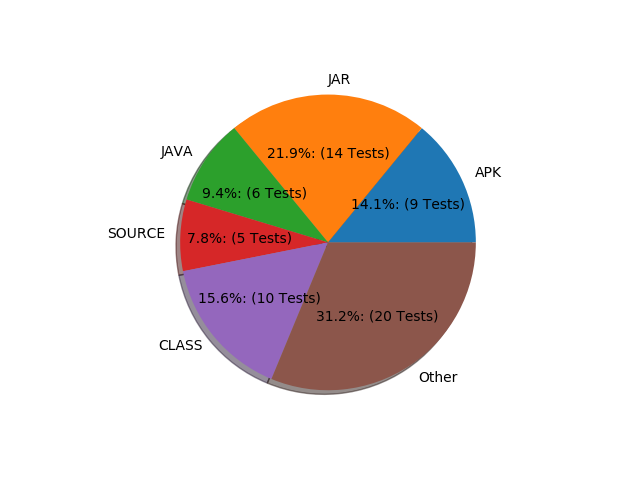

In [4]:
activeTests = [int(grouping[x]['Active']) for x in grouping.keys()]

#Mimicing a graph from https://matplotlib.org
# Raw url: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%: ({:d} Tests)".format(pct, absolute)

axss = getFig()
wedges, texts, autotexts = axss.pie(activeTests, 
                                    labels=grouping.keys(), 
                                    autopct=lambda pct: func(pct, activeTests), 
                                    shadow=True, 
                                    startangle=0)
#Mimicing a graph from https://matplotlib.org
# Raw url: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
#axss.legend(wedges, grouping.keys(),
#          title="Active Tests",
#          loc="best")

<IPython.core.display.Javascript object>


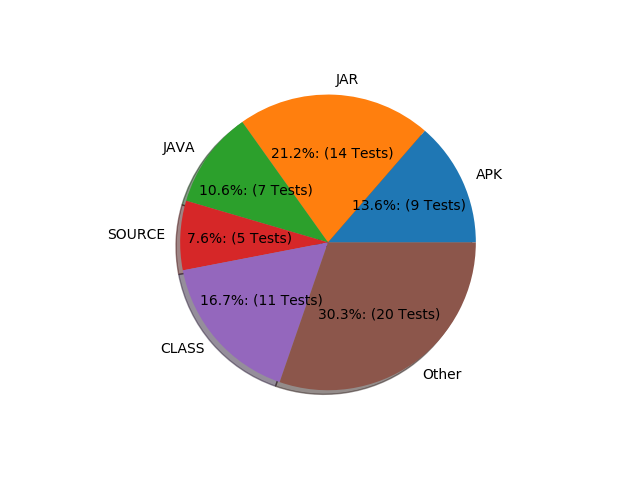

In [5]:
totalTests = [int(grouping[x]['Active']) + int(grouping[x]['Skipped']) for x in grouping.keys()]

#Mimicing a graph from https://matplotlib.org
# Raw url: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%: ({:d} Tests)".format(pct, absolute)

axss = getFig()
wedges, texts, autotexts = axss.pie(totalTests, 
                                    labels=grouping.keys(), 
                                    autopct=lambda pct: func(pct, totalTests), 
                                    shadow=True, 
                                    startangle=0)
#Mimicing a graph from https://matplotlib.org
# Raw url: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
#axss.legend(wedges, grouping.keys(),
#          title="Total Tests",
#          loc="best")

In [6]:
#Running the tests
testResults = cryptoguard.TestUtils.tests()

Running all of the available tests.
01/66 | AnalyzerReportTest.simpleTest_1 | Pass | 11 s 
02/66 | ArgumentsCheckTest.testEnvironmentVariables | Pass | 9 s 
03/66 | ArgumentsCheckTest.parameterCheck_verifyingJavaSevenHome | Pass | 9 s 
04/66 | ArgumentsCheckTest.parameterCheck_verifyingJavaAndroidHome | Pass | 9 s 
05/66 | ArgumentsCheckTest.parameterCheck_VersionOut | Pass | 10 s 
06/66 | ArgumentsCheckTest.paramaterCheck_jar_enhancedInputFile | Pass | 10 s 
07/66 | ArgumentsCheckTest.paramaterCheck_jar_SkipValidation | Pass | 9 s 
08/66 | ArgumentsCheckTest.paramaterCheck_jar | Pass | 10 s 
09/66 | ArgumentsCheckTest.paramaterCheck_Barejar | Pass | 10 s 
10/66 | ArgumentsCheckTest.parameterCheck_gdl | Pass | 10 s 
11/66 | CWEListTest.sampleTestOne | Pass | 9 s 
12/66 | EntryPointTest_APK.main_TestableApk_Legacy | Pass | 17 s 
13/66 | EntryPointTest_APK.main_TestableApk_Legacy_Stream | Pass | 17 s 
14/66 | EntryPointTest_APK.main_TestableApk_Scarf | Pass | 19 s 
15/66 | EntryPointTest

In [7]:
replica = {
            'APK': {},
            'JAR': {},
            'JAVA': {},
            'SOURCE': {},
            'CLASS': {},
            'OTHER':{}
        }
#results = {
    #'APK': {
        #'Pass':[
            #{
                #'name': name,
                #'timeTaken':time,
                #'timesReRun':timeReRun
            #},
        #],
        #'Fail':[
            #{
                #'name': name,
                #'timeTaken':time,
                #'timesReRun':timeReRun
            #},
        #],
        #'Skip':[
            #{
                #'name': name,
                #'timeTaken':time,
                #'timesReRun':timeReRun
            #},
        #]
    #}
#},
for key, value in testResults.items():
    passArr = [int(x['timeTaken']) for x in value['Pass']]
    replica[key]['PassCount'] = len(passArr)
    replica[key]['PassTime'] = sum(passArr)
    
    failArr = [int(x['timeTaken']) for x in value['Fail']]
    replica[key]['FailCount'] = len(failArr)
    replica[key]['FailTime'] = sum(failArr)
    
    replica[key]['Skipped'] = len([x for x in value['Skip']])


<IPython.core.display.Javascript object>


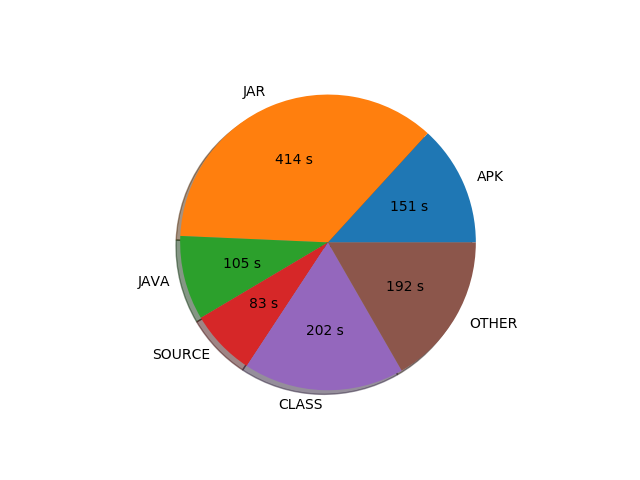

In [8]:
totalTime = [int(replica[x]['PassTime'] + replica[x]['FailTime']) for x in replica.keys()]

#Mimicing a graph from https://matplotlib.org
# Raw url: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d} s".format(absolute)

axss = getFig()
wedges, texts, autotexts = axss.pie(totalTime, 
                                    labels=replica.keys(), 
                                    autopct=lambda pct: func(pct, totalTime), 
                                    shadow=True, 
                                    startangle=0)
#Mimicing a graph from https://matplotlib.org
# Raw url: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
#axss.legend(wedges, replica.keys(),
#          title="Test Times",
#          loc="upper left")

<IPython.core.display.Javascript object>


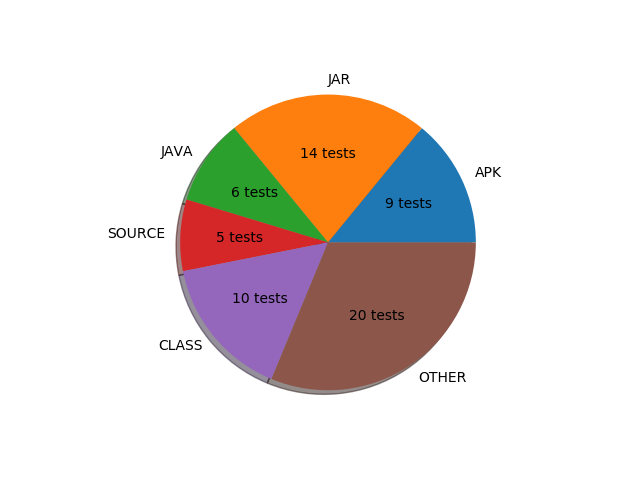

In [9]:
totalCounts = [int(replica[x]['PassCount'] + replica[x]['FailCount']) for x in replica.keys()]

#Mimicing a graph from https://matplotlib.org
# Raw url: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d} tests".format(absolute)

axss = getFig()
wedges, texts, autotexts = axss.pie(totalCounts, 
                                    labels=replica.keys(), 
                                    autopct=lambda pct: func(pct, totalCounts), 
                                    shadow=True, 
                                    startangle=0)
#Mimicing a graph from https://matplotlib.org
# Raw url: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
#axss.legend(wedges, replica.keys(),
#          title="Total Numer of tests",
#          loc="upper left")

<IPython.core.display.Javascript object>


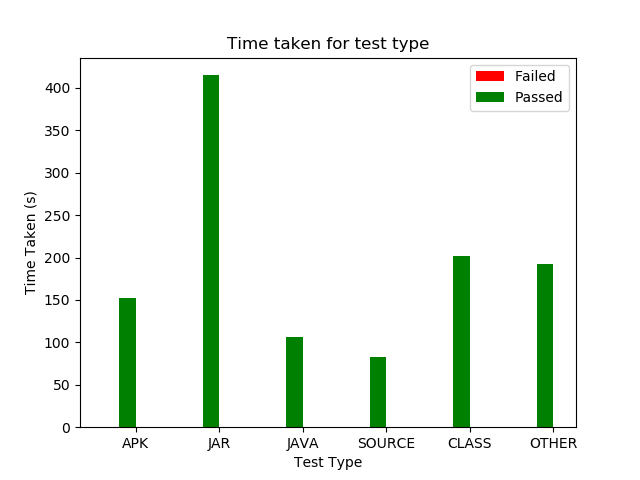

In [10]:
groups = np.arange(len(replica.keys()))
groupwidth = .2
trend = 50
rangeLine = range(0, 100)

Passed = [float(replica[x]['PassTime']) for x in replica.keys()]
#ant.reverse()

Failed = [float(replica[x]['FailTime']) for x in replica.keys()]
#sbt.reverse()

ax = getFig()

plt.bar(groups + (groupwidth*0), Failed, color='red', width=groupwidth, label='Failed')
plt.bar(groups + (groupwidth*1), Passed, color='green', width=groupwidth, label='Passed')

plt.legend(loc='best')
ax.set_title("Time taken for test type")
ax.set_xticks([x + groupwidth*1.5 for x in np.arange(6)])
ax.set_xticklabels(replica.keys())
ax.set_xlabel('Test Type')
ax.set_ylabel('Time Taken (s)')
plt.show()
if saveFigs:
    plt.savefig('Resources/Imgs/BuildToolTrend.png')

<IPython.core.display.Javascript object>


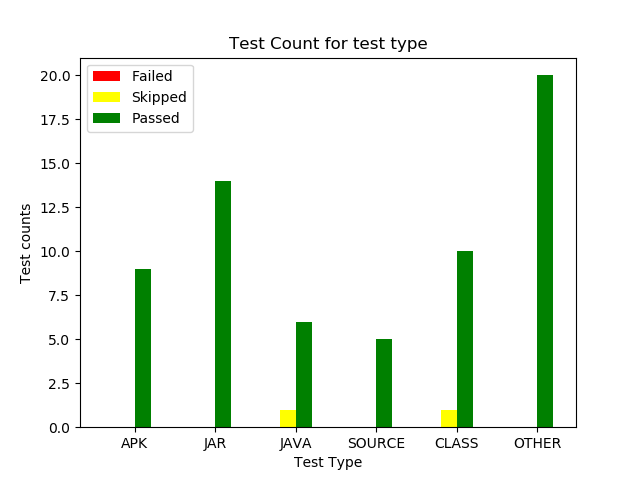

In [11]:
groups = np.arange(len(replica.keys()))
groupwidth = .2
trend = 50
rangeLine = range(0, 100)

Passed = [int(replica[x]['PassCount']) for x in replica.keys()]
#ant.reverse()

Skipped = [int(replica[x]['Skipped']) for x in replica.keys()]
#sbt.reverse()

Failed = [int(replica[x]['FailCount']) for x in replica.keys()]
#sbt.reverse()

ax = getFig()

plt.bar(groups + (groupwidth*0), Failed, color='red', width=groupwidth, label='Failed')
plt.bar(groups + (groupwidth*1), Skipped, color='yellow', width=groupwidth, label='Skipped')
plt.bar(groups + (groupwidth*2), Passed, color='green', width=groupwidth, label='Passed')

plt.legend(loc='best')
ax.set_title("Test Count for test type")
ax.set_xticks([x + groupwidth*1.5 for x in np.arange(6)])
ax.set_xticklabels(replica.keys())
ax.set_xlabel('Test Type')
ax.set_ylabel('Test counts')
plt.show()
if saveFigs:
    plt.savefig('Resources/Imgs/BuildToolTrend.png')

<IPython.core.display.Javascript object>


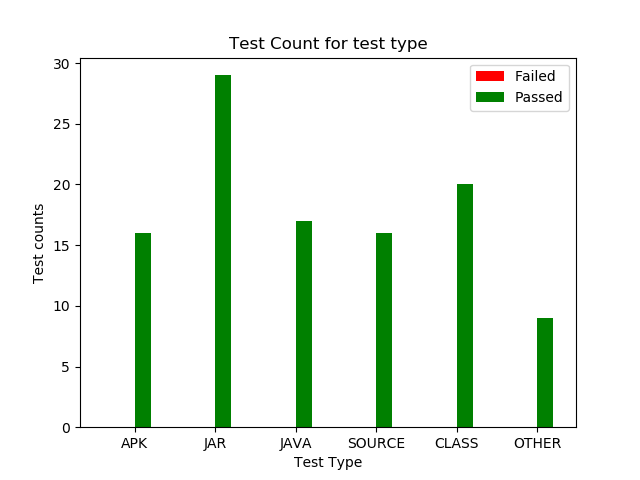

In [12]:
groups = np.arange(len(replica.keys()))
groupwidth = .2
trend = 50
rangeLine = range(0, 100)

def smartDiv(x,y):
    if y == 0:
        y = 1
    return x/y

Passed = [int(smartDiv(replica[x]['PassTime'],replica[x]['PassCount'])) for x in replica.keys()]
#ant.reverse()

Failed = [int(smartDiv(replica[x]['FailTime'],replica[x]['FailCount'])) for x in replica.keys()]
#sbt.reverse()

ax = getFig()

plt.bar(groups + (groupwidth*0), Failed, color='red', width=groupwidth, label='Failed')
plt.bar(groups + (groupwidth*2), Passed, color='green', width=groupwidth, label='Passed')

plt.legend(loc='best')
ax.set_title("Test Count for test type")
ax.set_xticks([x + groupwidth*1.5 for x in np.arange(6)])
ax.set_xticklabels(replica.keys())
ax.set_xlabel('Test Type')
ax.set_ylabel('Test counts')
plt.show()
if saveFigs:
    plt.savefig('Resources/Imgs/BuildToolTrend.png')